In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
 

In [2]:
pro = ts.pro_api('af5f423bb57f376e71c2903058362f8e3e053fe30f486463f9bdac8e')

In [3]:
stockbasic = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

stockbasic.to_csv("StockBasic.csv",index = False, encoding='utf_8_sig')

In [4]:
stockbasic

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,ST国华,深圳,软件服务,19910114
3,000005.SZ,000005,ST星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427
...,...,...,...,...,...,...
4839,871981.BJ,871981,晶赛科技,None,None,20211115
4840,872925.BJ,872925,锦好医疗,None,None,20211025
4841,873169.BJ,873169,七丰精工,None,None,20220415
4842,873223.BJ,873223,荣亿精密,None,None,20220609


In [5]:
df = ts.pro_bar(ts_code='002920.SZ', adj='qfq', start_date='20171229', end_date='20220729')

In [6]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002920.SZ,20220729,186.0000,203.9900,184.0100,195.0000,186.1700,8.8300,4.7430,39873.96,776912.387
1,002920.SZ,20220728,184.0000,189.6800,180.1800,186.1700,183.0200,3.1500,1.7211,27824.68,517725.873
2,002920.SZ,20220727,176.8400,185.6000,175.0900,183.0200,176.8400,6.1800,3.4947,27631.72,502104.961
3,002920.SZ,20220726,174.0800,178.4900,173.0000,176.8400,173.8800,2.9600,1.7023,28150.31,496690.182
4,002920.SZ,20220725,179.7000,179.7000,169.3000,173.8800,179.7200,-5.8400,-3.2495,37140.86,641765.859
...,...,...,...,...,...,...,...,...,...,...,...
1107,002920.SZ,20180105,44.9075,46.2512,42.3564,42.4830,44.9464,-2.4634,-5.4808,332764.78,1497286.565
1108,002920.SZ,20180104,42.2493,46.7381,42.0156,44.9464,43.3885,1.5579,3.5906,423058.81,1933484.554
1109,002920.SZ,20180103,43.8169,45.7644,40.9153,43.3885,41.9085,1.4800,3.5315,526376.92,2333228.464
1110,002920.SZ,20180102,41.9085,41.9085,41.9085,41.9085,38.1013,3.8072,9.9923,27117.87,116715.312


df.to_csv("002920.csv", index = False, encoding='utf_8_sig')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     1112 non-null   object 
 1   trade_date  1112 non-null   object 
 2   open        1112 non-null   float64
 3   high        1112 non-null   float64
 4   low         1112 non-null   float64
 5   close       1112 non-null   float64
 6   pre_close   1112 non-null   float64
 7   change      1112 non-null   float64
 8   pct_chg     1112 non-null   float64
 9   vol         1112 non-null   float64
 10  amount      1112 non-null   float64
dtypes: float64(9), object(2)
memory usage: 95.7+ KB


In [8]:
df.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1.112000e+03
mean,63.252484,65.055886,61.685439,63.422674,63.278413,0.144261,0.209791,44457.189083,2.923763e+05
std,42.228588,43.630385,41.059468,42.463406,42.288027,2.686042,3.302241,35400.364833,2.679962e+05
min,15.851200,16.381200,15.753100,16.381200,16.381200,-13.729700,-10.009800,1504.580000,5.887421e+03
25%,26.032900,26.665325,25.499225,26.108250,26.108250,-0.765500,-1.757750,26779.790000,8.586944e+04
50%,42.390450,44.814350,41.260950,42.630050,42.546250,0.069350,0.183400,37078.715000,2.302241e+05
75%,98.777700,102.359575,96.567075,99.206975,99.089150,0.935400,2.034675,52169.957500,4.217530e+05
max,186.000000,203.990000,184.010000,195.000000,186.170000,13.809600,10.009000,526376.920000,2.333228e+06


In [9]:
#f["ma5"] = 'NaN'
#df["ma5"] = talib.MA(df.close, 5, 0)
df = df.sort_values(by = "trade_date")

In [10]:
df["ma5"] = ta.MA(df.close, 5, 0)
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5
1111,002920.SZ,20171229,38.1013,38.1013,38.1013,38.1013,34.6349,3.4664,10.0084,1504.58,5887.421,NaN
1110,002920.SZ,20180102,41.9085,41.9085,41.9085,41.9085,38.1013,3.8072,9.9923,27117.87,116715.312,NaN
1109,002920.SZ,20180103,43.8169,45.7644,40.9153,43.3885,41.9085,1.4800,3.5315,526376.92,2333228.464,NaN
1108,002920.SZ,20180104,42.2493,46.7381,42.0156,44.9464,43.3885,1.5579,3.5906,423058.81,1933484.554,NaN
1107,002920.SZ,20180105,44.9075,46.2512,42.3564,42.4830,44.9464,-2.4634,-5.4808,332764.78,1497286.565,42.16554
...,...,...,...,...,...,...,...,...,...,...,...,...
4,002920.SZ,20220725,179.7000,179.7000,169.3000,173.8800,179.7200,-5.8400,-3.2495,37140.86,641765.859,177.52000
3,002920.SZ,20220726,174.0800,178.4900,173.0000,176.8400,173.8800,2.9600,1.7023,28150.31,496690.182,177.04800
2,002920.SZ,20220727,176.8400,185.6000,175.0900,183.0200,176.8400,6.1800,3.4947,27631.72,502104.961,178.45200
1,002920.SZ,20220728,184.0000,189.6800,180.1800,186.1700,183.0200,3.1500,1.7211,27824.68,517725.873,179.92600


In [11]:
zt = df[df["pct_chg"] >9.9]

df = df.reset_index(drop=True)
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5
0,002920.SZ,20171229,38.1013,38.1013,38.1013,38.1013,34.6349,3.4664,10.0084,1504.58,5887.421,NaN
1,002920.SZ,20180102,41.9085,41.9085,41.9085,41.9085,38.1013,3.8072,9.9923,27117.87,116715.312,NaN
2,002920.SZ,20180103,43.8169,45.7644,40.9153,43.3885,41.9085,1.4800,3.5315,526376.92,2333228.464,NaN
3,002920.SZ,20180104,42.2493,46.7381,42.0156,44.9464,43.3885,1.5579,3.5906,423058.81,1933484.554,NaN
4,002920.SZ,20180105,44.9075,46.2512,42.3564,42.4830,44.9464,-2.4634,-5.4808,332764.78,1497286.565,42.16554
...,...,...,...,...,...,...,...,...,...,...,...,...
1107,002920.SZ,20220725,179.7000,179.7000,169.3000,173.8800,179.7200,-5.8400,-3.2495,37140.86,641765.859,177.52000
1108,002920.SZ,20220726,174.0800,178.4900,173.0000,176.8400,173.8800,2.9600,1.7023,28150.31,496690.182,177.04800
1109,002920.SZ,20220727,176.8400,185.6000,175.0900,183.0200,176.8400,6.1800,3.4947,27631.72,502104.961,178.45200
1110,002920.SZ,20220728,184.0000,189.6800,180.1800,186.1700,183.0200,3.1500,1.7211,27824.68,517725.873,179.92600


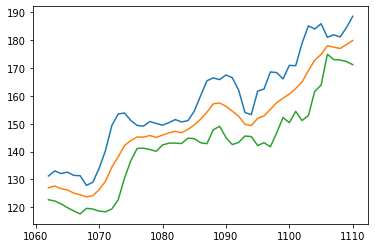

In [12]:
upperband, middleband, lowerband = ta.BBANDS(df.close)
plt.plot(upperband[-50:-1])
plt.plot(middleband[-50:-1])
plt.plot(lowerband[-50:-1])


In [13]:
real = ta.MFI(df.high, df.low, df.close, df.vol, timeperiod=14)

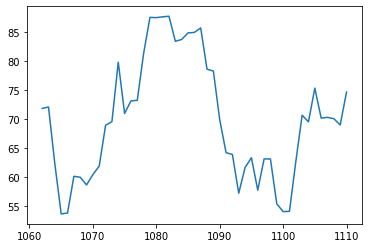

In [14]:
plt.plot(real[-50:-1])

涨停后又回调， 回调后再突破涨停价，返回当天的信息
1、找出涨停的日期
2、后续是否有回调， 找出涨停后出现回调的
3、回调后10天内再次突破涨停价的
4、记录回调后再次涨停的日期，30 天的价格 、 60 天的价格

code zhangtingdate1st close zuangzedate close xdaytupo xdayprice   xdaypricehigh  ydaypri2  ydayprice  zdayprice zdayprice

In [ ]:
def 

In [101]:
def get_limit_up_date(dateframe,return_Peroid =10, x_day=20, y_day= 40, z_day= 60):
    
    zt = dateframe[dateframe["pct_chg"] >9.9]
    zt = zt.dropna()
    
    val_return = pd.DataFrame(columns=['code','zhangtingri','close','zhuangzheri','zzr_close','n_daytupo','tupo_close','x_dayprice','x_dayhigh','y_dayprice','y_dayhigh','z_dayprice','z_dayhigh'])
    for j in zt.index:
        val_return.loc[j,'code'] = zt.loc[j,'ts_code']
        val_return.loc[j,'zhangtingri'] = zt.loc[j,'trade_date']
        val_return.loc[j,'close'] = zt.loc[j,'close']
    
    val_return = val_return.sort_index()
    
    
    for m in zt.index:
        
        ztt = dateframe.loc[m:,["trade_date","close"]]
        
        j = m
        k = 0
        for j in ztt.index:           # 涨停后， 找到转跌的前一天，以这天开始取 review_period_1 天的数据
            if(ztt.iloc[k+1]['close'] < ztt.iloc[k]['close']):
                val_return.loc[m,'zzr_close'] = dateframe.loc[j,'close']
                val_return.loc[m,'zhuangzheri'] = k
                break
            k +=1
       #     if( k > return_Peroid):
       #         val_return.loc[i,'ztr_close'] = 0
      #          val_return.loc[i,'zhuangzheri'] = 999
      #          continue
        
        high_up_index = j
        ztd  =  dateframe.loc[j:].iloc[0:z_day+1]
    
        ztv = ztd.iloc[0:return_Peroid]
        
        # 查找突破日， 把突破日和当天的收盘价保存下来
        k =0
        for j in ztv.index:
            k +=1
            if(ztv.loc[j,'close'] > ztv.loc[high_up_index,'close']):
                val_return.loc[m,'tupo_close'] = ztv.loc[j,'close']
                val_return.loc[m,'n_daytupo'] = k
                break
        
        # fillout the data
        val_return.loc[m,'x_dayprice'] = ztd.iloc[x_day]['close']
        val_return.loc[m,'x_dayhigh'] = ztd.loc[:,'close'][0:x_day].max()

        val_return.loc[m,'y_dayprice'] = ztd.iloc[y_day]['close']
        val_return.loc[m,'y_dayhigh'] = ztd.loc[:,'close'][0:y_day].max()

        val_return.loc[m,'z_dayprice'] = ztd.iloc[z_day]['close']
        val_return.loc[m,'z_dayhigh'] = ztd.loc[:,'close'][0:z_day].max()
    
    
    return (val_return.reset_index(drop=True) )
    

In [102]:
aaa = get_limit_up_date(df)
aaa

,code,zhangtingri,close,zhuangzheri,zzr_close,n_daytupo,tupo_close,x_dayprice,x_dayhigh,y_dayprice,y_dayhigh,z_dayprice,z_dayhigh
0,002920.SZ,20180108,46.7283,0,46.7283,NaN,NaN,32.4537,46.7283,39.9221,46.7283,38.1889,46.7283
1,002920.SZ,20200224,41.6406,1,45.354,5,45.8492,31.1141,47.7802,35.8871,47.7802,47.7307,48.5328
2,002920.SZ,20200430,40.6305,6,47.8297,5,48.1466,51.1991,57.1044,73.6373,66.9466,69.1834,76.7092
3,002920.SZ,20200601,57.1044,0,57.1044,NaN,NaN,63.2781,60.9717,73.0507,76.7092,68.5969,76.7092
4,002920.SZ,20200630,60.9717,1,63.2781,4,64.6103,73.0507,76.7092,68.5969,76.7092,69.8396,76.7092
5,002920.SZ,20200710,73.6373,1,76.3712,7,76.7092,69.2928,76.7092,64.0238,76.7092,72.7823,76.7092
6,002920.SZ,20200717,70.3864,2,76.7092,NaN,NaN,74.5618,76.7092,66.867,76.7092,66.539,76.7092
7,002920.SZ,20201113,77.4349,1,84.0063,6,85.1098,73.3788,85.2689,100.0719,96.2643,109.0591,124.9656
8,002920.SZ,20210111,96.2643,1,100.0719,4,102.776,109.0591,124.9656,78.9262,124.9656,91.2637,124.9656
9,002920.SZ,20210118,113.0556,2,124.9656,NaN,NaN,92.9239,124.9656,79.9402,124.9656,102.3883,124.9656


In [96]:
df.iloc[519:,].iloc[0:3]

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5
519,002920.SZ,20200224,39.2243,41.6406,39.2144,41.6406,37.8578,3.7828,9.9921,66736.37,278484.404,37.77260
520,002920.SZ,20200225,40.9771,45.8096,40.6107,45.3540,41.6406,3.7134,8.9177,124513.94,546588.758,39.64022
521,002920.SZ,20200226,44.5618,47.0375,42.2446,43.3735,45.3540,-1.9805,-4.3668,119832.14,539836.809,40.97312


In [15]:

val_return =pd.DataFrame(columns=['code','zhangtingri','close','zhuangzheri','ztr_close','n_daytupo','tupo_close','x_dayprice','x_dayhigh','y_dayprice','y_dayhigh','z_dayprice','z_dayhigh'])
val_return

,code,zhangtingri,close,zhuangzheri,ztr_close,n_daytupo,tupo_close,x_dayprice,x_dayhigh,y_dayprice,y_dayhigh,z_dayprice,z_dayhigh


In [16]:
return_Peroid = 10
review_period_1 = 60   # z day
x_day = 20
y_day = 40
z_day = review_period_1
pct_chg_stop_loss = 5  # loss 5% , them sell 

zt = df[df["pct_chg"] >9.9]
zt = zt.drop([0,1,5])
zt

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5
519,002920.SZ,20200224,39.2243,41.6406,39.2144,41.6406,37.8578,3.7828,9.9921,66736.37,278484.404,37.77260
566,002920.SZ,20200430,39.6402,40.6305,39.1352,40.6305,36.9368,3.6937,10.0001,51929.59,211936.888,36.92098
585,002920.SZ,20200601,52.2728,57.1044,51.8155,57.1044,51.9149,5.1895,9.9962,60967.30,333179.266,51.80484
604,002920.SZ,20200630,55.1758,60.9717,55.0962,60.9717,55.4243,5.5474,10.0090,54973.30,331065.886,55.85774
612,002920.SZ,20200710,67.3542,73.6373,67.3542,73.6373,66.9466,6.6907,9.9941,77603.61,558404.109,67.29654
617,002920.SZ,20200717,65.1173,70.3864,64.2922,70.3864,63.9840,6.4024,10.0063,96012.31,664593.200,70.48778
696,002920.SZ,20201113,71.3109,77.4349,70.5852,77.4349,70.3963,7.0386,9.9985,89450.85,684795.847,72.64706
736,002920.SZ,20210111,90.4684,96.2643,88.1122,96.2643,87.5157,8.7486,9.9966,50579.82,476203.853,88.88366
741,002920.SZ,20210118,102.0901,113.0556,97.5468,113.0556,102.7760,10.2796,10.0019,63161.56,682329.010,101.87530
943,002920.SZ,20211119,114.1655,124.8243,114.1556,124.8243,113.4775,11.3468,9.9992,50242.09,613044.019,113.42370


In [17]:
for j in zt.index:
    val_return.loc[j,'code'] = zt.loc[j,'ts_code']
    val_return.loc[j,'zhangtingri'] = zt.loc[j,'trade_date']
    val_return.loc[j,'close'] = zt.loc[j,'close']
    
val_return = val_return.sort_index()
val_return
    


,code,zhangtingri,close,zhuangzheri,ztr_close,n_daytupo,tupo_close,x_dayprice,x_dayhigh,y_dayprice,y_dayhigh,z_dayprice,z_dayhigh
519,002920.SZ,20200224,41.6406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,002920.SZ,20200430,40.6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,002920.SZ,20200601,57.1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,002920.SZ,20200630,60.9717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,002920.SZ,20200710,73.6373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,002920.SZ,20200717,70.3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,002920.SZ,20201113,77.4349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,002920.SZ,20210111,96.2643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,002920.SZ,20210118,113.0556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,002920.SZ,20211119,124.8243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
zt.index

Int64Index([519, 566, 585, 604, 612, 617, 696, 736, 741, 943, 944, 949, 965], dtype='int64')

In [19]:
i =519

In [20]:
j = i
k = 0
for j in range(i,i+review_period_1):           # 涨停后， 找到转跌的前一天，以这天开始取 review_period_1 天的数据
    if(df.loc[j+1,'close'] < df.loc[j,'close']):
        val_return.loc[i,'ztr_close'] = df.loc[j,'close']
        val_return.loc[i,'zhuangzheri'] = k
        break
    k +=1
        
high_up_index = j
ztd  =  df.loc[j:j+review_period_1]
val_return


,code,zhangtingri,close,zhuangzheri,ztr_close,n_daytupo,tupo_close,x_dayprice,x_dayhigh,y_dayprice,y_dayhigh,z_dayprice,z_dayhigh
519,002920.SZ,20200224,41.6406,1,45.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,002920.SZ,20200430,40.6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,002920.SZ,20200601,57.1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,002920.SZ,20200630,60.9717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,002920.SZ,20200710,73.6373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,002920.SZ,20200717,70.3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,002920.SZ,20201113,77.4349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,002920.SZ,20210111,96.2643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,002920.SZ,20210118,113.0556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,002920.SZ,20211119,124.8243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ztd.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,38.522685,39.818310,37.429013,38.541846,38.442008,0.099838,0.292354,59506.794262,235852.942115,38.245351
std,6.013432,6.439443,5.907396,6.156855,6.053884,1.468937,3.733432,26076.666441,120995.532105,5.715389
min,30.411000,31.371500,29.024600,30.193100,30.193100,-3.059900,-9.117700,26644.140000,89000.517000,30.933820
25%,32.678700,33.609500,31.985500,32.906400,32.906400,-0.633700,-1.652700,38486.660000,149688.937000,32.435080
50%,36.441700,37.134900,35.441500,36.045600,36.045600,0.000000,0.000000,51570.800000,211863.372000,36.920980
75%,44.561800,46.918700,42.512000,43.898400,43.373500,0.841700,2.439000,69467.630000,274838.864000,43.474540
max,48.621900,50.008300,47.780200,48.532800,48.532800,3.713400,10.000100,124513.940000,557468.924000,48.071340


In [22]:
#return_Peroid = 10
#review_period_1 = 60
#review_period_2 = 30
#pct_chg_stop_loss = 5  # loss 5% , them sell 
ztv = ztd[0:return_Peroid]
ztv

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5
520,002920.SZ,20200225,40.9771,45.8096,40.6107,45.3540,41.6406,3.7134,8.9177,124513.94,546588.758,39.64022
521,002920.SZ,20200226,44.5618,47.0375,42.2446,43.3735,45.3540,-1.9805,-4.3668,119832.14,539836.809,40.97312
522,002920.SZ,20200227,44.0667,45.4333,42.2842,43.0764,43.3735,-0.2971,-0.6850,59149.68,258946.674,42.26046
523,002920.SZ,20200228,41.0959,47.3346,41.0959,42.6506,43.0764,-0.4258,-0.9885,124086.29,557468.924,43.21902
524,002920.SZ,20200302,44.6906,46.9187,43.6805,45.8492,42.6506,3.1986,7.4995,111491.13,513485.378,44.06074
525,002920.SZ,20200303,46.7107,50.0083,46.7107,47.7802,45.8492,1.9310,4.2116,106415.37,515153.073,44.54598
526,002920.SZ,20200304,47.8000,48.1070,43.0170,45.0570,47.7802,-2.7232,-5.6994,97565.15,449794.799,44.88268
527,002920.SZ,20200305,45.1659,45.5323,41.3534,42.4625,45.0570,-2.5945,-5.7583,103775.83,450390.348,44.75990
528,002920.SZ,20200306,42.7100,43.2646,41.5910,42.4625,42.4625,0.0000,0.0000,58547.66,251514.005,44.72228
529,002920.SZ,20200309,40.8979,42.2644,39.1154,39.6105,42.4625,-2.8520,-6.7165,67416.05,276404.462,43.47454


In [30]:
#ztv['close'].max()
k =0
for j in ztv.index:
    k +=1
    if(ztv.loc[j,'close'] > ztv.loc[high_up_index,'close']):
        val_return.loc[i,'tupo_close'] = ztv.loc[j,'close']
        val_return.loc[i,'n_daytupo'] = k
    
ztd

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma5
520,002920.SZ,20200225,40.9771,45.8096,40.6107,45.3540,41.6406,3.7134,8.9177,124513.94,546588.758,39.64022
521,002920.SZ,20200226,44.5618,47.0375,42.2446,43.3735,45.3540,-1.9805,-4.3668,119832.14,539836.809,40.97312
522,002920.SZ,20200227,44.0667,45.4333,42.2842,43.0764,43.3735,-0.2971,-0.6850,59149.68,258946.674,42.26046
523,002920.SZ,20200228,41.0959,47.3346,41.0959,42.6506,43.0764,-0.4258,-0.9885,124086.29,557468.924,43.21902
524,002920.SZ,20200302,44.6906,46.9187,43.6805,45.8492,42.6506,3.1986,7.4995,111491.13,513485.378,44.06074
...,...,...,...,...,...,...,...,...,...,...,...,...
576,002920.SZ,20200519,46.5424,48.9487,46.3641,48.1466,46.1958,1.9508,4.2229,37883.03,182620.479,47.02364
577,002920.SZ,20200520,47.9287,49.3943,47.0375,47.8594,48.1466,-0.2872,-0.5965,42693.89,207411.163,47.02958
578,002920.SZ,20200521,48.6219,48.9487,46.5424,48.0872,47.8594,0.2278,0.4760,37183.73,181029.945,47.28904
579,002920.SZ,20200522,48.1763,49.9786,47.7802,48.5328,48.0872,0.4456,0.9266,38486.66,189112.800,47.76436


In [56]:
val_return.loc[i,'x_dayprice'] = ztd.iloc[x_day]['close']
val_return.loc[i,'x_dayhigh'] = ztd.loc[:,'close'][0:x_day].max()

val_return.loc[i,'y_dayprice'] = ztd.iloc[y_day]['close']
val_return.loc[i,'y_dayhigh'] = ztd.loc[:,'close'][0:y_day].max()

val_return.loc[i,'z_dayprice'] = ztd.iloc[z_day]['close']
val_return.loc[i,'z_dayhigh'] = ztd.loc[:,'close'][0:z_day].max()

val_return


,code,zhangtingri,close,zhuangzheri,ztr_close,n_daytupo,tupo_close,x_dayprice,x_dayhigh,y_dayprice,y_dayhigh,z_dayprice,z_dayhigh
519,002920.SZ,20200224,41.6406,1,45.354,6,47.7802,31.1141,47.7802,35.8871,47.7802,47.7307,48.5328
566,002920.SZ,20200430,40.6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,002920.SZ,20200601,57.1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,002920.SZ,20200630,60.9717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,002920.SZ,20200710,73.6373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,002920.SZ,20200717,70.3864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,002920.SZ,20201113,77.4349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,002920.SZ,20210111,96.2643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,002920.SZ,20210118,113.0556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,002920.SZ,20211119,124.8243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
